+---------+--------+-------+--------+-----------+---------------+
| Iterasi |   a    |   b   |   c    |    f(c)   | Error Relatif |
+---------+--------+-------+--------+-----------+---------------+
|    1    |   0    |   10  |  5.0   |   395.0   |   1.0000e+00  |
|    2    |  5.0   |   10  |  7.5   |  108.125  |   3.3333e-01  |
|    3    |  7.5   |   10  |  8.75  | -134.9219 |   1.4286e-01  |
|    4    |  7.5   |  8.75 | 8.125  |   -3.877  |   7.6923e-02  |
|    5    |  7.5   | 8.125 | 7.8125 |  54.4128  |   4.0000e-02  |
|    6    | 7.8125 | 8.125 | 7.9688 |  25.8516  |   1.9608e-02  |
|    7    | 7.9688 | 8.125 | 8.0469 |  11.1347  |   9.7087e-03  |
|    8    | 8.0469 | 8.125 | 8.0859 |   3.6659  |   4.8309e-03  |
|    9    | 8.0859 | 8.125 | 8.1055 |  -0.0963  |   2.4096e-03  |
+---------+--------+-------+--------+-----------+---------------+

Nilai x yang memenuhi f(x) = 0 adalah: 8.1055


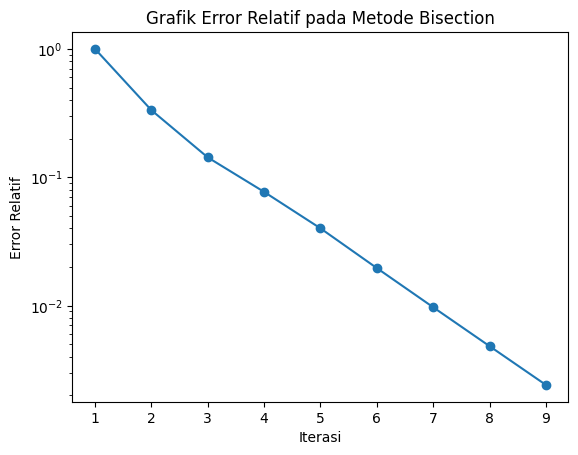

In [1]:
# NO 1 Bisection
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable


def f(x):
    return 500 - x**3 + 4*x


def bisection(a, b, tol, max_iter):
    table = PrettyTable()
    table.field_names = ["Iterasi", "a", "b", "c", "f(c)", "Error Relatif"]

    iterasi = 0
    errors = []

    while (b - a) / 2 > tol and iterasi < max_iter:
        iterasi += 1
        c = (a + b) / 2
        f_c = f(c)

        error_rel = np.abs((b - a) / 2 / c)
        errors.append(error_rel)

        table.add_row([iterasi, round(a, 4), round(b, 4), round(
            c, 4), round(f_c, 4), "{:.4e}".format(error_rel)])

        if f_c == 0:
            break
        elif f_c * f(a) < 0:
            b = c
        else:
            a = c

    print(table)
    return c, errors


# Menentukan interval awal
a = 0
b = 10

# Menentukan toleransi dan maksimal iterasi
toleransi = 0.01
max_iterasi = 100

# Menjalankan metode bisection
solusi, errors = bisection(a, b, toleransi, max_iterasi)

# Menampilkan hasil
print("\nNilai x yang memenuhi f(x) = 0 adalah:", round(solusi, 4))

# Membuat grafik error relatif
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.yscale('log')
plt.xlabel('Iterasi')
plt.ylabel('Error Relatif')
plt.title('Grafik Error Relatif pada Metode Bisection')
plt.show()

+---------+--------+--------+---------------+
| Iterasi |   x    |  g(x)  | Error Relatif |
+---------+--------+--------+---------------+
|    1    |  0.5   | 1.5078 |   6.6839e-01  |
|    2    | 1.5078 | 2.5253 |   4.0292e-01  |
|    3    | 2.5253 | 3.5336 |   2.8536e-01  |
|    4    | 3.5336 | 4.501  |   2.1492e-01  |
|    5    | 4.501  | 5.3865 |   1.6440e-01  |
|    6    | 5.3865 | 6.1499 |   1.2413e-01  |
|    7    | 6.1499 | 6.7642 |   9.0805e-02  |
|    8    | 6.7642 | 7.2242 |   6.3680e-02  |
|    9    | 7.2242 | 7.5466 |   4.2719e-02  |
|    10   | 7.5466 | 7.7603 |   2.7539e-02  |
|    11   | 7.7603 | 7.8961 |   1.7203e-02  |
|    12   | 7.8961 |  7.98  |   1.0506e-02  |
|    13   |  7.98  | 8.0307 |   6.3204e-03  |
+---------+--------+--------+---------------+

Nilai x yang memenuhi f(x) = 0 adalah: 7.98


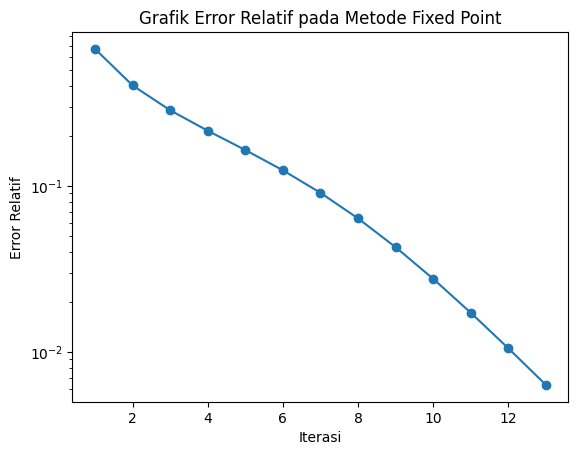

In [2]:
#Fixed Point
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable


def f(x):
    return 500 - x**3 + 4*x


def g(x):
    return x - (f(x) / (4 * x - 500))  # Modified fixed-point iteration formula


def fixed_point(initial_guess, tol, max_iter):
    table = PrettyTable()
    table.field_names = ["Iterasi", "x", "g(x)", "Error Relatif"]

    iterasi = 0
    errors = []

    x = initial_guess

    while iterasi < max_iter:
        iterasi += 1
        x_new = g(x)

        error_rel = np.abs((x_new - x) / x_new)
        errors.append(error_rel)

        table.add_row([iterasi, round(x, 4), round(
            x_new, 4), "{:.4e}".format(error_rel)])

        if error_rel < tol:
            break

        x = x_new

    print(table)
    return x, errors


# Menentukan tebakan awal
initial_guess = 0.5

# Menentukan toleransi dan maksimal iterasi
toleransi = 0.01
max_iterasi = 100

# Menjalankan metode Fixed Point
solusi, errors = fixed_point(initial_guess, toleransi, max_iterasi)

# Menampilkan hasil
print("\nNilai x yang memenuhi f(x) = 0 adalah:", round(solusi, 4))

# Membuat grafik error relatif
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.yscale('log')
plt.xlabel('Iterasi')
plt.ylabel('Error Relatif')
plt.title('Grafik Error Relatif pada Metode Fixed Point')
plt.show()

In [3]:
#Regula Falsi
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable


def f(x):
    return 500 - x**3 + 4*x


def regula_falsi(a, b, tol, max_iter):
    table = PrettyTable()
    table.field_names = ["Iterasi", "a", "b", "c", "f(c)", "Error Relatif"]

    iterasi = 0
    errors = []

    while (b - a) / 2 > tol and iterasi < max_iter:
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        iterasi += 1

        f_c = f(c)
        # Menggunakan rumus error relatif yang benar
        error_rel = np.abs((c - a) / c)
        errors.append(error_rel)

        table.add_row([iterasi, round(a, 4), round(b, 4), round(
            c, 4), round(f_c, 4), "{:.4e}".format(error_rel)])

        if f_c == 0:
            break
        elif f_c * f(a) < 0:
            b = c
        else:
            a = c

    print(table)
    return c, errors


# Menentukan interval awal
a = 0
b = 10

# Menentukan toleransi dan maksimal iterasi
toleransi = 0.01
max_iterasi = 100

# Menjalankan metode Regula Falsi
solusi, errors = regula_falsi(a, b, toleransi, max_iterasi)

# Menampilkan hasil
print("\nNilai x yang memenuhi f(x) = 0 adalah:", round(solusi, 4))

# Membuat grafik error relatif
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.yscale('log')
plt.xlabel('Iterasi')
plt.ylabel('Error Relatif')
plt.title('Grafik Error Relatif pada Metode Regula Falsi')
plt.show()

+---------+----------+---------------+-------------+---------------+
| Iterasi |    x     |      f(x)     |    f'(x)    | Error Relatif |
+---------+----------+---------------+-------------+---------------+
|    1    |   1.5    |    502.625    |    -2.75    |   9.9186e-01  |
|    2    | 184.2727 | -6256008.3509 | -101865.314 |   4.9988e-01  |
|    3    | 122.8582 | -1853447.8883 | -45278.4246 |   4.9967e-01  |
|    4    | 81.9238  |  -549003.7541 | -20130.5057 |   4.9902e-01  |
|    5    | 54.6515  |  -162514.0051 |  -8956.3686 |   4.9704e-01  |
|    6    | 36.5065  |  -48006.8835  |  -3994.1627 |   4.9084e-01  |
|    7    | 24.4872  |  -14085.1195  |  -1794.8673 |   4.7161e-01  |
|    8    | 16.6397  |   -4040.673   |  -826.6434  |   4.1594e-01  |
|    9    | 11.7517  |   -1075.9309  |  -410.3072  |   2.8723e-01  |
|    10   |  9.1294  |   -224.3909   |  -246.0401  |   1.1098e-01  |
|    11   |  8.2174  |    -22.022    |  -198.5785  |   1.3680e-02  |
|    12   |  8.1065  |    -0.3018 

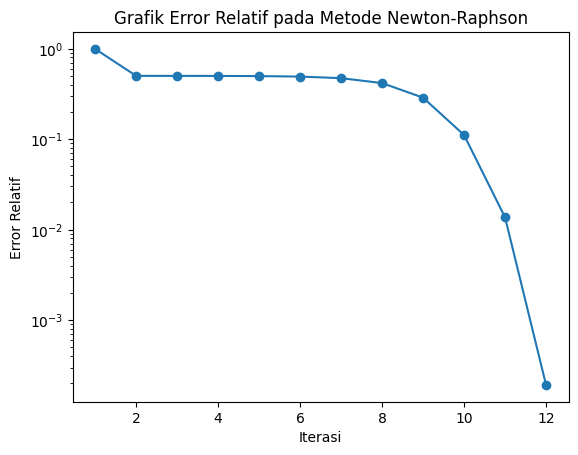

In [4]:
#Newton Raphson
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable


def f(x):
    return 500 - x**3 + 4*x


def df(x):
    return -3*x**2 + 4


def newton_raphson(initial_guess, tol, max_iter):
    table = PrettyTable()
    table.field_names = ["Iterasi", "x", "f(x)", "f'(x)", "Error Relatif"]

    iterasi = 0
    errors = []

    x = initial_guess

    while iterasi < max_iter:
        iterasi += 1
        f_x = f(x)
        df_x = df(x)

        if df_x == 0:
            print("Turunan nol. Metode Newton-Raphson tidak konvergen.")
            return None, None

        x_new = x - f_x / df_x

        error_rel = np.abs((x_new - x) / x_new)
        errors.append(error_rel)

        table.add_row([iterasi, round(x, 4), round(f_x, 4),
                      round(df_x, 4), "{:.4e}".format(error_rel)])

        if error_rel < tol:
            break

        x = x_new

    print(table)
    return x, errors


# Menentukan tebakan awal
initial_guess = 1.5

# Menentukan toleransi dan maksimal iterasi
toleransi = 0.01
max_iterasi = 100

# Menjalankan metode Newton-Raphson
solusi, errors = newton_raphson(initial_guess, toleransi, max_iterasi)

# Menampilkan hasil
if solusi is not None:
    print("\nNilai x yang memenuhi f(x) = 0 adalah:", round(solusi, 4))

    # Membuat grafik error relatif
    plt.plot(range(1, len(errors) + 1), errors, marker='o')
    plt.yscale('log')
    plt.xlabel('Iterasi')
    plt.ylabel('Error Relatif')
    plt.title('Grafik Error Relatif pada Metode Newton-Raphson')
    plt.show()

In [ ]:
#Secant
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable


def f(x):
    return 500 - x**3 + 4*x


def secant(x_prev, x_curr, tol, max_iter):
    table = PrettyTable()
    table.field_names = ["Iterasi", "x", "f(x)", "Error Relatif"]

    iterasi = 0
    errors = []

    while iterasi < max_iter:
        iterasi += 1
        f_x_curr = f(x_curr)
        f_x_prev = f(x_prev)

        if f_x_curr - f_x_prev == 0:
            print("Pembagi nol. Metode Secant tidak konvergen.")
            return None, None

        x_new = x_curr - f_x_curr * (x_curr - x_prev) / (f_x_curr - f_x_prev)

        error_rel = np.abs((x_new - x_curr) / x_new)
        errors.append(error_rel)

        table.add_row([iterasi, round(x_curr, 4), round(
            f_x_curr, 4), "{:.4e}".format(error_rel)])

        if error_rel < tol:
            break

        x_prev = x_curr
        x_curr = x_new

    print(table)
    return x_curr, errors


# Menentukan tebakan awal
x_prev = 1.5
x_curr = 2.0

# Menentukan toleransi dan maksimal iterasi
toleransi = 0.01
max_iterasi = 100

# Menjalankan metode Secant
solusi, errors = secant(x_prev, x_curr, toleransi, max_iterasi)

# Menampilkan hasil
if solusi is not None:
    print("\nNilai x yang memenuhi f(x) = 0 adalah:", round(solusi, 4))

    # Membuat grafik error relatif
    plt.plot(range(1, len(errors) + 1), errors, marker='o')
    plt.yscale('log')
    plt.xlabel('Iterasi')
    plt.ylabel('Error Relatif')
    plt.title('Grafik Error Relatif pada Metode Secant')
    plt.show()